**Data collection:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('/content/apps.csv')
data1.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data2 = pd.read_csv('/content/user_reviews.csv')
data2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**Data Cleaning:**

In [4]:
data1.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [5]:
data2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [6]:
print("\033[1mMissing values in Apps:\033[0m")
data1.isna().sum()

Missing values in Apps:


Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [7]:
print("\033[1mMissing values in User Reviews:\033[0m")
data2.isna().sum()

Missing values in User Reviews:


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [8]:
# Fill missing values in the 'Translated_Review' column with an empty string
data2['Translated_Review'].fillna('', inplace=True)

# Fill missing values in the 'Sentiment' column with the most frequent value
most_frequent_sentiment = data2['Sentiment'].mode()[0]
data2['Sentiment'].fillna(most_frequent_sentiment, inplace=True)

# Fill missing values in the 'Sentiment_Polarity' column with the mean value
mean_sentiment_polarity = data2['Sentiment_Polarity'].mean()
data2['Sentiment_Polarity'].fillna(mean_sentiment_polarity, inplace=True)

# Fill missing values in the 'Sentiment_Subjectivity' column with the mean value
mean_sentiment_subjectivity = data2['Sentiment_Subjectivity'].mean()
data2['Sentiment_Subjectivity'].fillna(mean_sentiment_subjectivity, inplace=True)

In [9]:
print("\033[1mMissing values in User Reviews:\033[0m")
data2.isna().sum()

Missing values in User Reviews:


App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       64295 non-null  object 
 2   Sentiment               64295 non-null  object 
 3   Sentiment_Polarity      64295 non-null  float64
 4   Sentiment_Subjectivity  64295 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [12]:
# Convert 'Last Updated' column to datetime
data1['Last Updated'] = pd.to_datetime(data1['Last Updated'])

# Remove dollar sign ('$') from 'Price' column and convert to float
data1['Price'] = data1['Price'].str.replace('$', '').astype(float)

# Convert 'Installs' column to numeric after removing '+' and ','
data1['Installs'] = data1['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Display the data types of each column
print(data1.dtypes)

Unnamed: 0                 int64
App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


<ipython-input-12-b86c9f68bf1b>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Price'] = data1['Price'].str.replace('$', '').astype(float)
<ipython-input-12-b86c9f68bf1b>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Installs'] = data1['Installs'].str.replace('+', '').str.replace(',', '').astype(int)


In [13]:
# Convert 'Sentiment_Polarity' and 'Sentiment_Subjectivity' columns to float
data2['Sentiment_Polarity'] = pd.to_numeric(data2['Sentiment_Polarity'], errors='coerce')
data2['Sentiment_Subjectivity'] = pd.to_numeric(data2['Sentiment_Subjectivity'], errors='coerce')

# Convert 'App' and 'Sentiment' columns to string (object) type
data2['App'] = data2['App'].astype(str)
data2['Sentiment'] = data2['Sentiment'].astype(str)

# Display the data types of each column
print(data2.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


**Category Exploration:**

In [14]:
# Count the number of apps in each category
category_distribution = data1['Category'].value_counts()

# Display the distribution of apps across categories
print("\033[1mCategories in Apps:\033[0m")
print(category_distribution)

Categories in Apps:
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


In [15]:
# Extracting categories from the 'App' column
data2['Category'] = data2['App'].str.split(' - ').str[0]

# Count the number of apps in each category
category_distribution = data2['App'].groupby(data2['Category']).count().reset_index()
category_distribution.columns = ['Category', 'Number_of_Apps']

# Sort the categories by the number of apps in descending order
category_distribution = category_distribution.sort_values(by='Number_of_Apps', ascending=False)

# Display the app distribution across inferred categories
print(category_distribution)

                            Category  Number_of_Apps
362                  Calorie Counter             700
286                       Bowmasters             320
124              Angry Birds Classic             320
329                   CBS Sports App             320
1005                      Helix Jump             300
...                              ...             ...
632             Easy Healthy Recipes              31
611   Dresses Ideas & Fashions +3000              31
551       Detector de Radares Gratis              31
631           Easy Hair Style Design              30
605    Drawing Clothes Fashion Ideas              30

[1060 rows x 2 columns]


**Metrics Analysis:**

In [16]:
# App Ratings Analysis
ratings_summary = data1['Rating'].describe()
print("\033[1mApp Ratings Summary:\033[0m")
print(ratings_summary)

App Ratings Summary:
count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


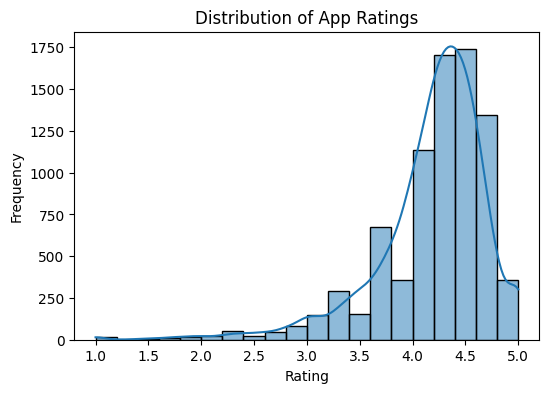

In [17]:
# Visualize the distribution of ratings
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='Rating', bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Convert size column to numeric
data1['Size'] = data1['Size'].astype(float)

size_summary = data1['Size'].describe()
print("\033[1mApp Size Summary:\033[0m")
print(size_summary)

App Size Summary:
count    8432.000000
mean       20.395327
std        21.827509
min         0.000000
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64


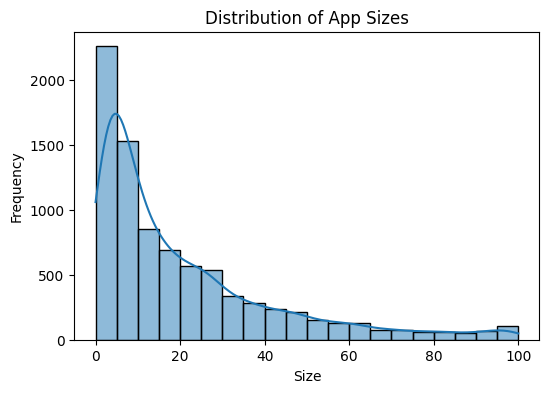

In [19]:
# Visualize the distribution of app sizes
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='Size', bins=20, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Popularity Analysis
popularity_summary = data1['Installs'].describe()
print("\033[1mPopularity Summary:\033[0m")
print(popularity_summary)

Popularity Summary:
count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


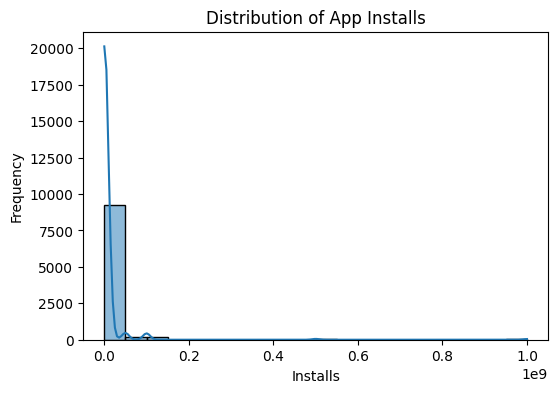

In [21]:
# Visualize the distribution of installs
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='Installs', bins=20, kde=True)
plt.title('Distribution of App Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Pricing Analysis
price_summary = data1['Price'].describe()
print("\033[1mPricing Summary:\033[0m")
print(price_summary)

Pricing Summary:
count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64


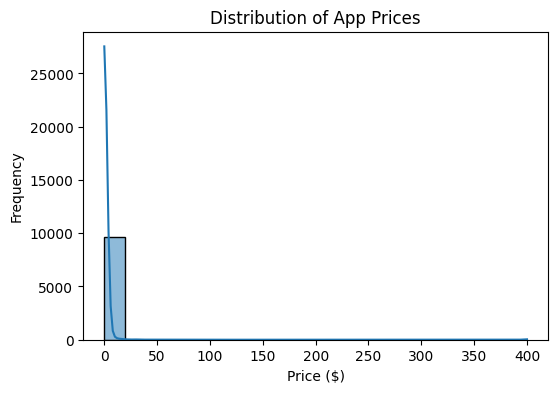

In [23]:
# Visualize the distribution of prices
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='Price', bins=20, kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [24]:
# 1. App Ratings Analysis
# Drop rows with missing ratings
data2.dropna(subset=['Sentiment_Polarity'], inplace=True)

# Convert 'Sentiment_Polarity' to numeric
data2['Sentiment_Polarity'] = pd.to_numeric(data2['Sentiment_Polarity'], errors='coerce')

# Calculate descriptive statistics for ratings
rating_stats = data2['Sentiment_Polarity'].describe()

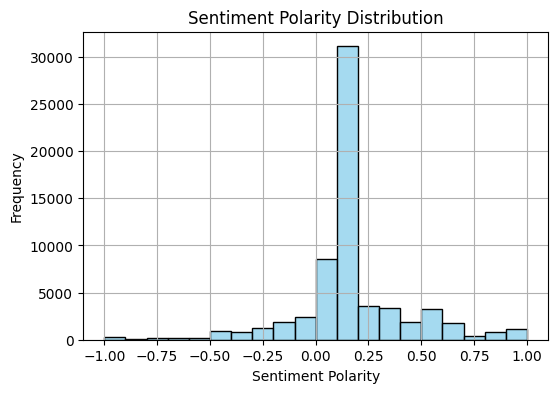

In [25]:
# Visualize rating distribution
plt.figure(figsize=(6, 4))
sns.histplot(data2['Sentiment_Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.grid(True)
plt.show()

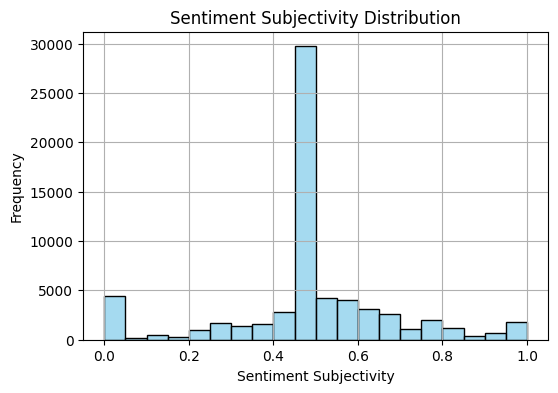

In [26]:
# 2. Sentiment Subjectivity Analysis (if applicable)
# Drop rows with missing sentiment subjectivity
data2_cleaned = data2.dropna(subset=['Sentiment_Subjectivity'])

# Convert 'Sentiment_Subjectivity' to numeric
data2_cleaned['Sentiment_Subjectivity'] = pd.to_numeric(data2_cleaned['Sentiment_Subjectivity'], errors='coerce')

# Calculate descriptive statistics for sentiment subjectivity
subjectivity_stats = data2_cleaned['Sentiment_Subjectivity'].describe()

# Visualize sentiment subjectivity distribution
plt.figure(figsize=(6, 4))
sns.histplot(data2_cleaned['Sentiment_Subjectivity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.title('Sentiment Subjectivity Distribution')
plt.grid(True)
plt.show()

**Sentiment Analysis:**

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Ensure 'Reviews' column is converted to strings
data1['Reviews'] = data1['Reviews'].astype(str)

# Calculate sentiment scores for each review
data1['Review_Sentiment'] = data1['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment into categories (positive, neutral, negative)
data1['Sentiment_Class'] = data1['Review_Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

# Display the DataFrame with sentiment analysis results
print(data1[['Reviews', 'Review_Sentiment', 'Sentiment_Class']])

     Reviews  Review_Sentiment Sentiment_Class
0        159               0.0         Neutral
1        967               0.0         Neutral
2      87510               0.0         Neutral
3     215644               0.0         Neutral
4        967               0.0         Neutral
...      ...               ...             ...
9654      38               0.0         Neutral
9655       4               0.0         Neutral
9656       3               0.0         Neutral
9657     114               0.0         Neutral
9658  398307               0.0         Neutral

[9659 rows x 3 columns]


In [30]:
# Count the number of neutral, positive, and negative sentiments
sentiment_counts = data1['Sentiment_Class'].value_counts()

# Display the counts
print("\033[1mSentiment Counts:\033[0m")
print(sentiment_counts)

Sentiment Counts:
Neutral     9636
Negative      18
Positive       5
Name: Sentiment_Class, dtype: int64


In [31]:
# Calculate the percentage of each sentiment
neutral_percentage = (sentiment_counts['Neutral'] / len(data1)) * 100
positive_percentage = (sentiment_counts['Positive'] / len(data1)) * 100
negative_percentage = (sentiment_counts['Negative'] / len(data1)) * 100

# Display the percentages
print("\033[1mSentiment Counts in percentage:\033[0m")
print(f"Neutral: {neutral_percentage:.2f}%")
print(f"Positive: {positive_percentage:.2f}%")
print(f"Negative: {negative_percentage:.2f}%")

Sentiment Counts in percentage:
Neutral: 99.76%
Positive: 0.05%
Negative: 0.19%


In [32]:
# Apply sentiment analysis to each review
data2['Review_Sentiment'] = data2['Translated_Review'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Classify sentiment into categories (positive, neutral, negative)
data2['Sentiment_Class'] = data2['Review_Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

# Count the number of reviews in each sentiment category
sentiment_counts = data2['Sentiment_Class'].value_counts()

# Calculate percentage of reviews in each sentiment category
sentiment_percentages = (sentiment_counts / len(data2)) * 100

In [33]:
# Display sentiment analysis results
print("\033[1mSentiment Analysis Results:\033[0m")
print(sentiment_counts)

Sentiment Analysis Results:
Neutral     30847
Positive    25715
Negative     7733
Name: Sentiment_Class, dtype: int64


In [34]:
# Display sentiment analysis results
print("\033[1mPercentage of Reviews in Each Sentiment Category:\033[0m")
print(sentiment_percentages.apply(lambda x: f"{x:.2f}%"))

Percentage of Reviews in Each Sentiment Category:
Neutral     47.98%
Positive    40.00%
Negative    12.03%
Name: Sentiment_Class, dtype: object


**Interactive Visualization:**

In [35]:
import plotly.express as px

In [36]:
print('\033[1mSentiment Distribution:\033[0m')

# Calculate sentiment counts
sentiment_counts = data1['Sentiment_Class'].value_counts()

# Create a DataFrame for plotting
sentiment_df = pd.DataFrame({'Sentiment': sentiment_counts.index, 'Count': sentiment_counts.values})

# Calculate percentages
sentiment_df['Percentage'] = (sentiment_df['Count'] / sentiment_df['Count'].sum()) * 100

# Plot an interactive pie chart
fig = px.pie(sentiment_df, values='Count', names='Sentiment')

# Update layout to set the size of the plot
fig.update_layout(width=600, height=400)

# Show the plot
fig.show()

Sentiment Distribution:


In [37]:
print('\033[1mSentiment Distribution:\033[0m')

# Calculate sentiment counts
sentiment_counts = data1['Sentiment_Class'].value_counts()

# Create a DataFrame for plotting
sentiment_df = pd.DataFrame({'Sentiment': sentiment_counts.index, 'Count': sentiment_counts.values})

# Calculate percentages
sentiment_df['Percentage'] = (sentiment_df['Count'] / sentiment_df['Count'].sum()) * 100

# Plot an interactive bar chart
fig = px.bar(sentiment_df, x='Sentiment', y='Count', text='Percentage',
             labels={'Count': 'Count', 'Sentiment': 'Sentiment'})

# Update layout to add annotations and set the size of the plot
fig.update_layout(annotations=[dict(x='Sentiment', y='Count', text='Percentage', showarrow=False)],
                  width=600, height=400)

# Show the plot
fig.show()

Sentiment Distribution:


In [38]:
print('\033[1mPercentage of Reviews in Each Sentiment Category:\033[0m')

# Calculate sentiment analysis results
sentiment_counts = data2['Sentiment_Class'].value_counts()
sentiment_percentages = (sentiment_counts / len(data2)) * 100

# Create a DataFrame for sentiment analysis results
sentiment_df = pd.DataFrame({
    'Sentiment_Class': sentiment_counts.index,
    'Count': sentiment_counts.values,
    'Percentage': sentiment_percentages.values
})

# Create an interactive pie chart
fig = px.pie(sentiment_df, values='Count', names='Sentiment_Class',
             labels={'Sentiment_Class': 'Sentiment Category'},
             hover_data=['Percentage'],
             hole=0.3)

# Update layout to set the size of the plot
fig.update_layout(width=600, height=400)

# Show the interactive plot
fig.show()

Percentage of Reviews in Each Sentiment Category:


**Skill Enhancement:**

In [39]:
import plotly.graph_objects as go

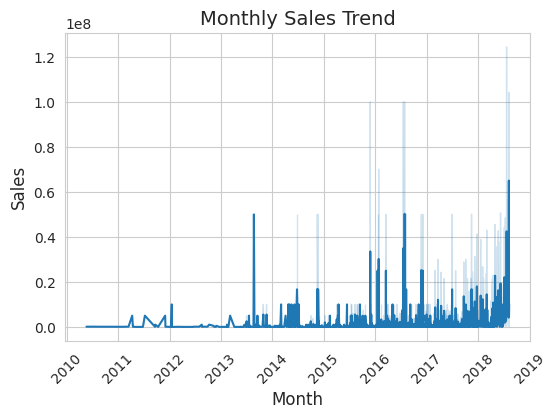

In [40]:
# Set the style for the plot
sns.set_style("whitegrid")

# Create a line plot for sales trend over time
plt.figure(figsize=(6, 4))
sns.lineplot(data=data1, x='Last Updated', y='Installs')

# Label the axes and add a title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Monthly Sales Trend', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [42]:
print('\033[1mDistribution of Sentiment Categories for user reviews:\033[0m')

# Calculate sentiment analysis results
sentiment_counts = data2['Sentiment_Class'].value_counts()
sentiment_percentages = (sentiment_counts / len(data2)) * 100

# Create a horizontal bar chart
fig = go.Figure(go.Bar(
    x=sentiment_percentages.values,
    y=sentiment_percentages.index,
    orientation='h',
    marker_color=['lightgreen', 'lightskyblue', 'lightcoral'],  # Colors for positive, neutral, and negative sentiments
))

# Update layout
fig.update_layout(
    xaxis_title='Percentage (%)',
    yaxis_title='Sentiment Category',
    yaxis=dict(autorange="reversed"),# Reverse the y-axis to show positive sentiment at the top
    width=600, height=400
)

# Show the interactive plot
fig.show()

Distribution of Sentiment Categories for user reviews:
